<a href="https://colab.research.google.com/github/hankris1/711/blob/main/VDJ6000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import and clean

In [1]:
#Importer fil og bibliotek
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns

File_name="FAL23.csv"

In [2]:
#Les fil
Fremmedartslista=pd.read_csv(File_name)

In [3]:
print(Fremmedartslista.columns)

Index(['Id for vurderingen', 'Vurderingsområde', 'Ekspertkomité', 'Artsgruppe',
       'Taksonomisk sti', 'Vitenskapelig navn id', 'Vitenskapelig navn',
       'Autor', 'Populærnavn', 'Fremmedartsstatus', 'Etableringsklasse',
       'Risikokategori 2023', 'Utslagsgivende kriterier 2023',
       'Risikokategori 2018', 'Skår Invasjonspotensial',
       'Skår Økologisk effekt', 'Skår A-kriteriet', 'Skår B-kriteriet',
       'Skår C-kriteriet', 'Skår D-kriteriet', 'Skår E-kriteriet',
       'Skår F-kriteriet', 'Skår G-kriteriet', 'Skår H-kriteriet',
       'Skår I-kriteriet', 'Artens levetid i Norge (beste anslag)',
       'Ekspansjonshastighet (beste anslag)', 'Geografisk variasjon i risiko',
       'Årsak til geografisk variasjon i risiko',
       'Klimaeffekter invasjonspotensial', 'Klimaeffekter økologisk effekt',
       'Kjent forekomstareal', 'Antatt forekomstareal beste anslag',
       'Fremtidig forekomstareal beste anslag',
       'Ant. forekomster fra én introduksjon beste anslag

In [4]:
#Spesifiserer hvilke rader i datasettet du vil vise og eksportere
new_columns = ["Ekspertkomité", "Vurderingsområde", "Vitenskapelig navn id", "Fremmedartsstatus", "Etableringsklasse", "Risikokategori 2018", "Risikokategori 2023", "Skår Invasjonspotensial", "Skår Økologisk effekt", "Vitenskapelig navn id", "Klimaeffekter invasjonspotensial", "Klimaeffekter økologisk effekt"]

#Filtrer bort NR i kolonnene "Risikokategori 2018" og "Risikokategori 2023"
condition = ~(Fremmedartslista['Risikokategori 2023'].str.contains('NR', na=False)) & \
        ~(Fremmedartslista['Risikokategori 2018'].str.contains('NR', na=False))

# Filtrer radene uten NR
filter_Fremmedartslista = Fremmedartslista[condition]

# Ta med kolonnene
Fremmedartslista = filter_Fremmedartslista[new_columns]

# Skriv nytt datasettet til en CSV-fil
Fremmedartslista.to_csv('nytt_datasett.csv', index=False)

In [5]:
New_file="nytt_datasett.csv"
FAL=pd.read_csv(New_file)
#Les ny fil

FAL.head()

,Ekspertkomité,Vurderingsområde,Vitenskapelig navn id,Fremmedartsstatus,Etableringsklasse,Risikokategori 2018,Risikokategori 2023,Skår Invasjonspotensial,Skår Økologisk effekt,Vitenskapelig navn id.1,Klimaeffekter invasjonspotensial,Klimaeffekter økologisk effekt
0,Karplanter,Fastlands-Norge med havområder,145490,Selvstendig reproduserende,C2,NK,LO,2.0,1.0,145490,Nei,Nei
1,Karplanter,Fastlands-Norge med havområder,103794,Selvstendig reproduserende,D1,LO,PH,4.0,1.0,103794,Nei,Nei
2,Karplanter,Fastlands-Norge med havområder,145491,Selvstendig reproduserende,C2,LO,LO,2.0,1.0,145491,Nei,Nei
3,Karplanter,Fastlands-Norge med havområder,103795,Selvstendig reproduserende,C2,PH,HI,4.0,2.0,103795,Nei,Nei
4,Karplanter,Fastlands-Norge med havområder,103796,Selvstendig reproduserende,C3,LO,PH,4.0,1.0,103796,Nei,Nei


In [6]:
FAL.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2125 entries, 0 to 2124
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ekspertkomité                     2125 non-null   object 
 1   Vurderingsområde                  2125 non-null   object 
 2   Vitenskapelig navn id             2125 non-null   int64  
 3   Fremmedartsstatus                 2125 non-null   object 
 4   Etableringsklasse                 2085 non-null   object 
 5   Risikokategori 2018               1497 non-null   object 
 6   Risikokategori 2023               2125 non-null   object 
 7   Skår Invasjonspotensial           2125 non-null   float64
 8   Skår Økologisk effekt             2125 non-null   float64
 9   Vitenskapelig navn id.1           2125 non-null   int64  
 10  Klimaeffekter invasjonspotensial  2125 non-null   object 
 11  Klimaeffekter økologisk effekt    2125 non-null   object 
dtypes: flo

# Barplots

<Axes: xlabel='Risikokategori 2023', ylabel='count'>

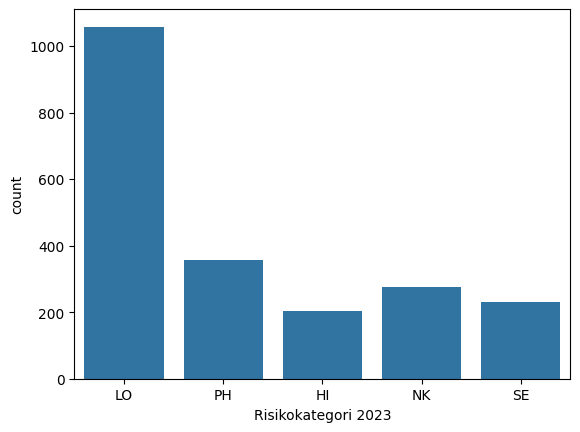

In [7]:
import seaborn as sns
# Tell ut i fra kategorier
sns.countplot(x ='Risikokategori 2023', data = FAL)

In [8]:
print('NK = Ingen kjent risiko',
      'LO = Lav risiko',
      'PH = Potensiell høy risiko',
      'HI = Høy risiko',
      'SE = Svært høy risiko')

NK = Ingen kjent risiko LO = Lav risiko PH = Potensiell høy risiko HI = Høy risiko SE = Svært høy risiko


<Axes: xlabel='Risikokategori 2023', ylabel='count'>

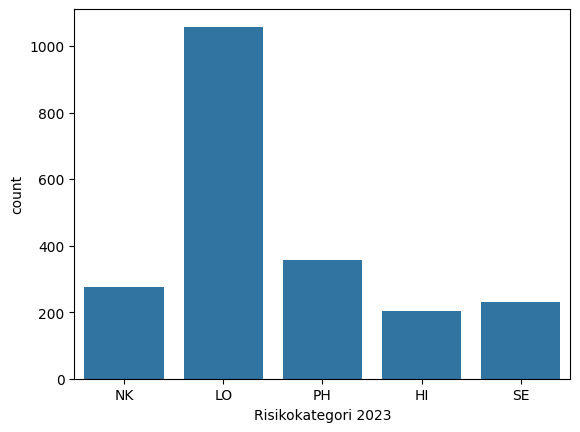

In [9]:
sns.countplot(x ='Risikokategori 2023', data = FAL, order=['NK', 'LO','PH','HI','SE'])

<Axes: xlabel='Risikokategori 2023', ylabel='count'>

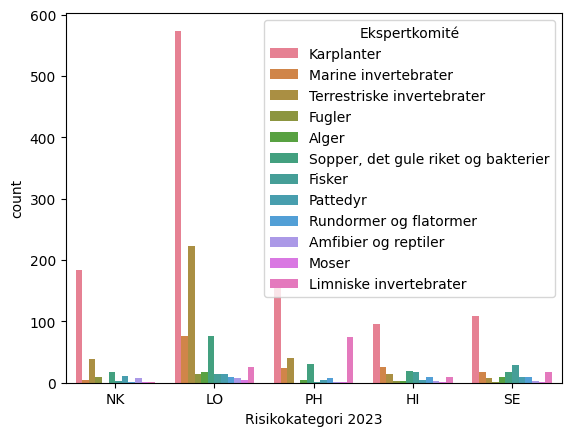

In [10]:
#Tell ut i fra ulike kategorier
sns.countplot(x ='Risikokategori 2023', hue = 'Ekspertkomité', data = FAL, order=['NK', 'LO','PH','HI','SE'])

<Axes: xlabel='Risikokategori 2023', ylabel='count'>

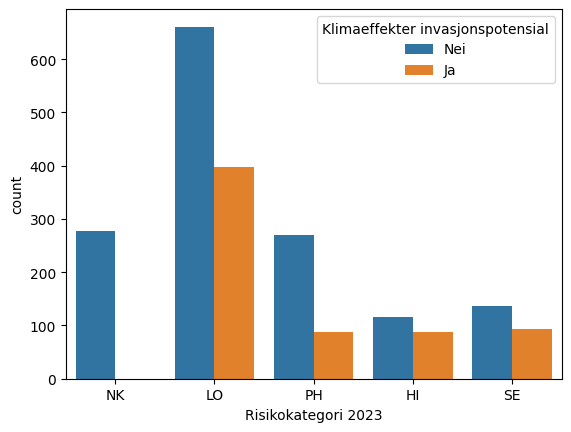

In [11]:
# Countplot
sns.countplot(x ='Risikokategori 2023', hue = 'Klimaeffekter invasjonspotensial', data = FAL, order=['NK', 'LO','PH','HI','SE'])

<Axes: xlabel='count', ylabel='Ekspertkomité'>

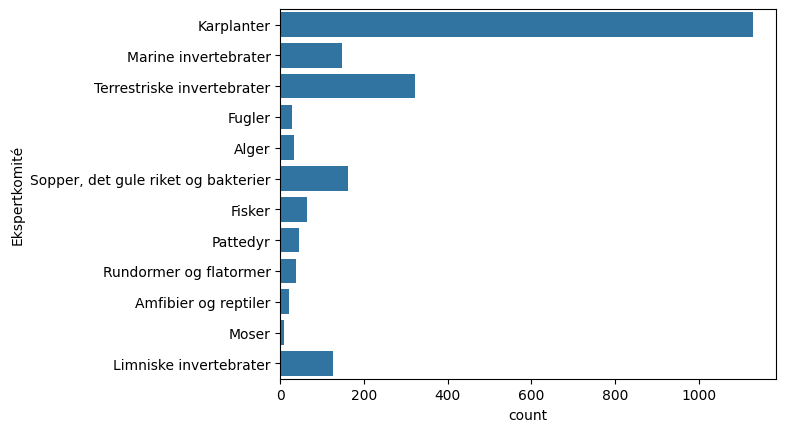

In [12]:
sns.countplot(y ='Ekspertkomité', data = FAL)

In [13]:
R2018=(FAL.groupby('Risikokategori 2018').size())
R2023=(FAL.groupby('Risikokategori 2023').size())

#Her teller jeg antallet i hver kategori ut fra år
print(R2018)
print(R2023)

Risikokategori 2018
HI    104
LO    726
NK    436
PH    101
SE    130
dtype: int64
Risikokategori 2023
HI     204
LO    1058
NK     277
PH     356
SE     230
dtype: int64


In [14]:
#Smelt sammen de to til én dataframe
risk_counts = pd.DataFrame({
    '2018': R2018,
    '2023': R2023
})

#Tilbakestill indeksen for å gjøre risikokategoriene til rader
risk_counts = risk_counts.reset_index()

#Lag nytt navn på dataen
risk_counts = risk_counts.rename(columns={'index': 'Risikokategori'})
risk_counts.head()

,Risikokategori,2018,2023
0,HI,104,204
1,LO,726,1058
2,NK,436,277
3,PH,101,356
4,SE,130,230


In [15]:
#Skal sammenligne dataen. Må omforme datarammen, der år blir en egen variabel
melted_df=pd.melt(risk_counts, id_vars=['Risikokategori'], value_vars=['2018','2023'], )

melted_df.head()

,Risikokategori,variable,value
0,HI,2018,104
1,LO,2018,726
2,NK,2018,436
3,PH,2018,101
4,SE,2018,130


<Axes: xlabel='Risikokategori', ylabel='value'>

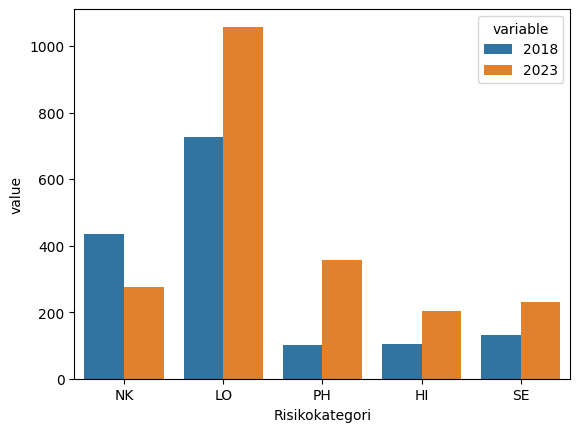

In [16]:
sns.barplot(data=melted_df, x='Risikokategori', y='value', hue='variable', order=['NK', 'LO','PH','HI','SE'])

In [17]:
#Ser at det er flere arter som har flyttet seg i mer alvorlige kategorier siden 2018

# Heatmaps

In [18]:
#Vise dataen, hvor mange scorer hvor?
SØ=(FAL.groupby('Skår Økologisk effekt').size())
SI=(FAL.groupby('Skår Invasjonspotensial').size())

print(SØ,SI)

Skår Økologisk effekt
1.0    1460
2.0     268
3.0     204
4.0     193
dtype: int64 Skår Invasjonspotensial
1.0    387
2.0    551
3.0    576
4.0    611
dtype: int64


In [19]:
#Lage pivot table
matrix = pd.read_csv('FAL23.csv')

pivot_table=pd.pivot_table(matrix, values="Risikokategori 2023",
                          index="Skår Økologisk effekt",
                          columns="Skår Invasjonspotensial",
                          aggfunc="size", fill_value=0)
print(pivot_table)

Skår Invasjonspotensial  1.0  2.0  3.0  4.0
Skår Økologisk effekt                      
1.0                      346  553  455  305
2.0                       26   36   96  128
3.0                       18   23   49  125
4.0                       73   11   26   86


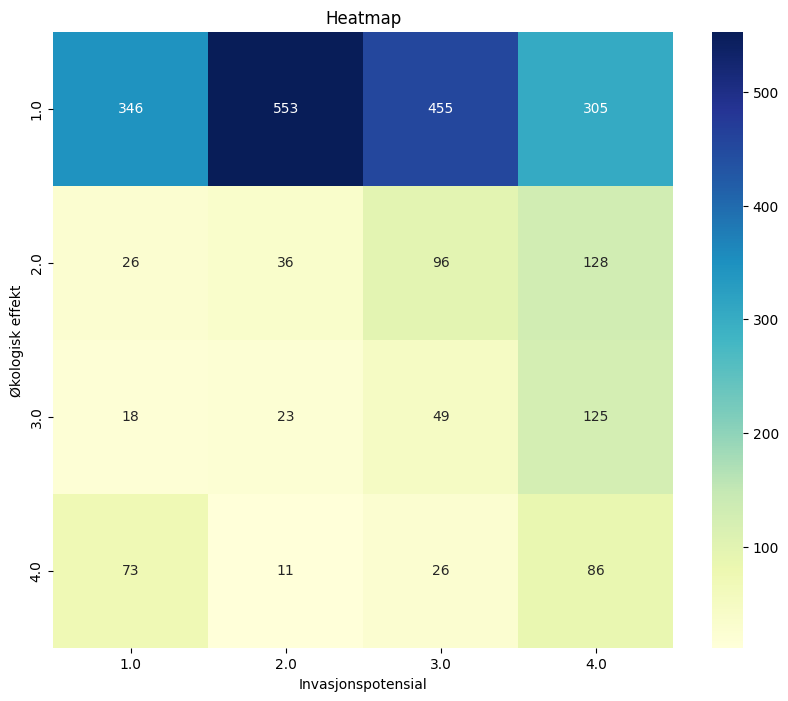

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap")
plt.xlabel('Invasjonspotensial')
plt.ylabel('Økologisk effekt')
plt.show()

In [21]:
pivot_table=pivot_table.reindex(index=pivot_table.index[::-1])
print(pivot_table)

Skår Invasjonspotensial  1.0  2.0  3.0  4.0
Skår Økologisk effekt                      
4.0                       73   11   26   86
3.0                       18   23   49  125
2.0                       26   36   96  128
1.0                      346  553  455  305


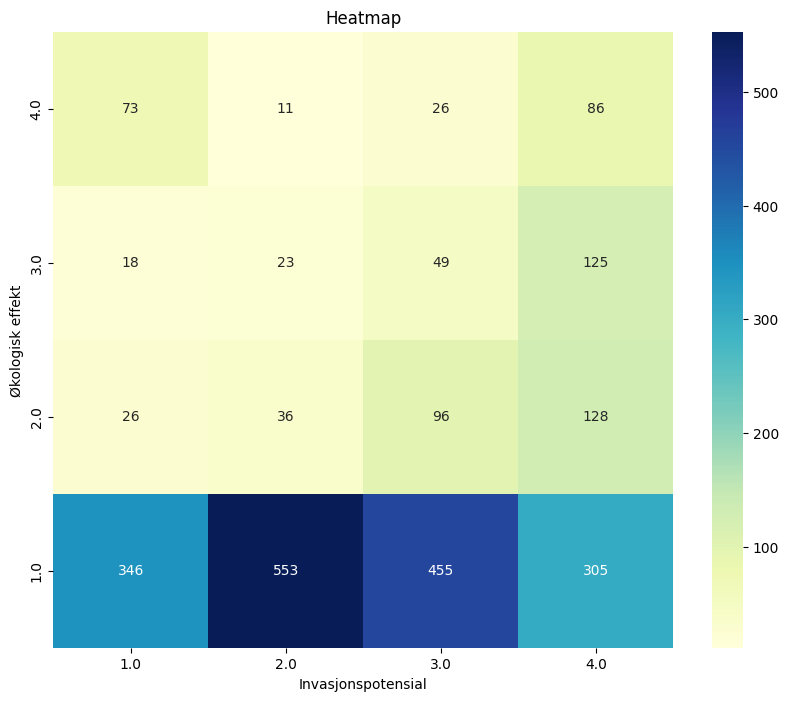

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap")
plt.xlabel('Invasjonspotensial')
plt.ylabel('Økologisk effekt')
plt.show()

# Slope

In [23]:
risk_counts.head()

,Risikokategori,2018,2023
0,HI,104,204
1,LO,726,1058
2,NK,436,277
3,PH,101,356
4,SE,130,230


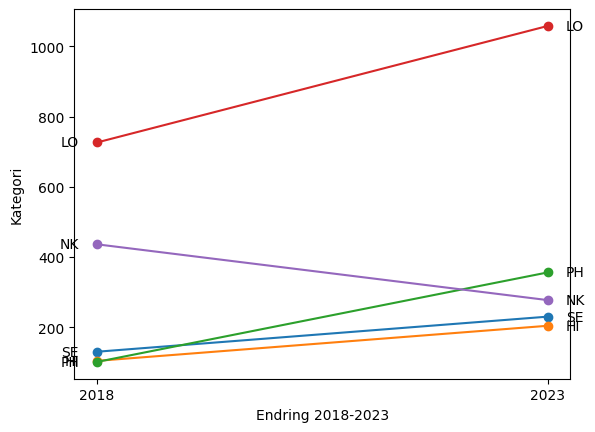

In [24]:
# Definer data
år = [2018, 2023]
verdier = [[130, 230], [104, 204], [101, 356], [726, 1058], [436, 277]]
labels = ['SE', 'HI', 'PH', 'LO', 'NK']

# Opprett figur og akseobjekt
fig, ax = plt.subplots()

# Plot linjene
for i, (start, slutt) in enumerate(verdier):
    ax.plot([år[0], år[1]], [start, slutt], marker='o')
    ax.text(år[0]-0.2, start, labels[i], ha='right', va='center')
    ax.text(år[1]+0.2, slutt, labels[i], ha='left', va='center')

# Formater akser og tittel
ax.set_xticks(år)
ax.set_xlabel('Endring 2018-2023')
ax.set_ylabel('Kategori')

# Vis diagrammet
plt.show()